<a href="https://colab.research.google.com/github/hhennessy20/PSYC_684_Project/blob/ppg-finetune-jack/src/training/phoneme_posteriorgram/train_ppg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Phonetic Posteriorgrams package
[link to source github](https://github.com/interactiveaudiolab/ppgs/tree/master)

In [5]:
!pip install ppgs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 27.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 21.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 87.2 MB/s e

### Input data test

In [2]:
# Mount drive once
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:


import soundfile as sf

TRAIN_DATA_LOC = "/content/drive/MyDrive/Speech Processing/PSYC684 Group Proj/ADReSS data unzipped/train/"

wav_path = TRAIN_DATA_LOC + "Full_wave_enhanced_audio/cd/S156.wav"

audio, sample_rate = sf.read(wav_path)

print("Sample rate:", sample_rate)
print("Audio shape:", audio.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Sample rate: 44100
Audio shape: (3366971,)


### CUDA sanity check

In [1]:
import torch

print("CUDA available:", torch.cuda.is_available())
print("Number of GPUs:", torch.cuda.device_count())
if torch.cuda.is_available():
    print("Current device:", torch.cuda.current_device())
    print("Device name:", torch.cuda.get_device_name(torch.cuda.current_device()))

CUDA available: True
Number of GPUs: 1
Current device: 0
Device name: NVIDIA A100-SXM4-40GB


### Inference Phonetic Posteriorgram test

In [7]:
import ppgs

In [8]:
TRAIN_DATA_LOC = "/content/drive/MyDrive/Speech Processing/PSYC684 Group Proj/ADReSS data unzipped/train/"

wav_path = TRAIN_DATA_LOC + "Full_wave_enhanced_audio/cd/S156.wav"


# Load speech audio at correct sample rate
audio = ppgs.load.audio(wav_path)

# Choose a gpu index to use for inference. Set to None to use cpu.
gpu = 0

# Infer PPGs
ppgs_tensor = ppgs.from_audio(audio, ppgs.SAMPLE_RATE, gpu=gpu)


/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/ffmpeg.py:88: UserWarning: torio.io._streaming_media_decoder.StreamingMediaDecoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be r

### Visualize

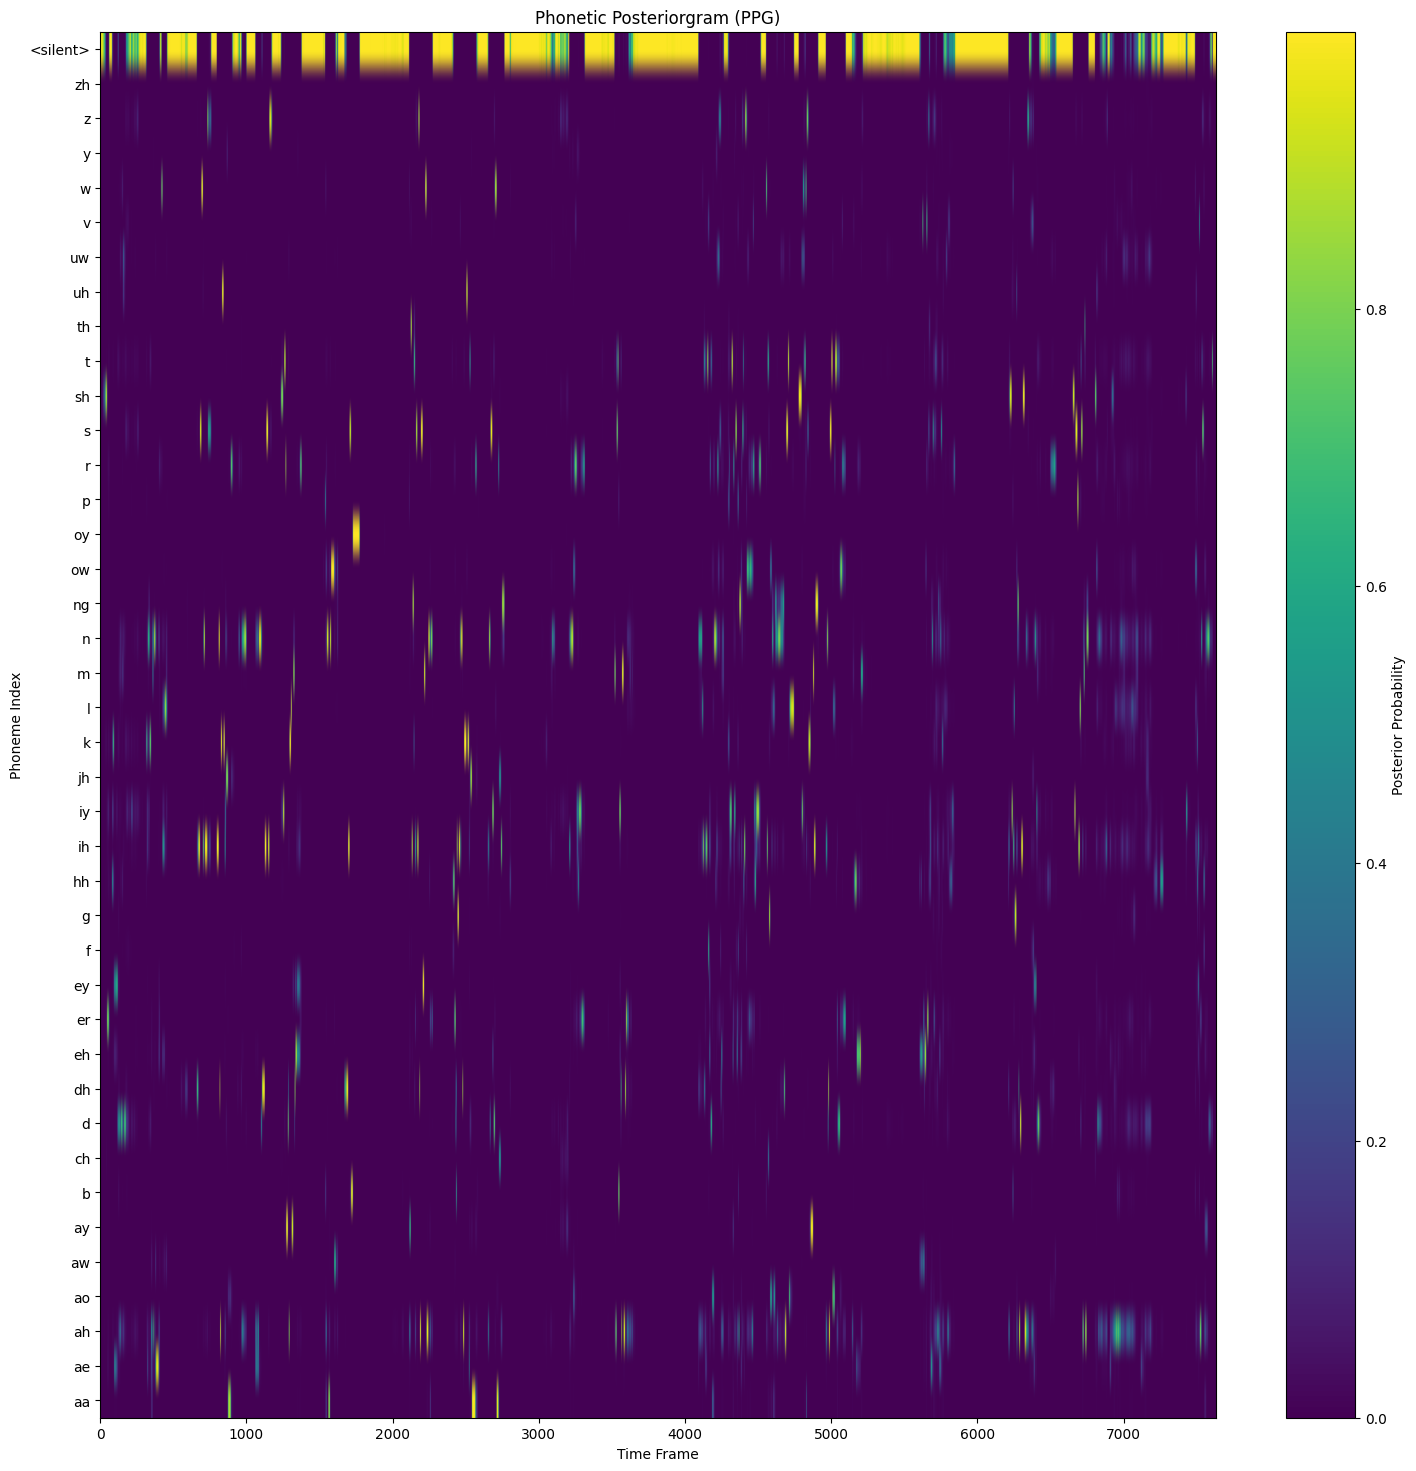

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Suppose your PPG tensor is called ppgs
# ppgs.shape = (1, num_phonemes, frames)
ppg = ppgs_tensor[0].cpu().numpy()  # remove batch dimension, shape=(num_phonemes, frames)

plt.figure(figsize=(18, 18))
plt.imshow(ppg, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Posterior Probability')
plt.xlabel('Time Frame')
plt.ylabel('Phoneme Index')
plt.yticks(np.arange(len(ppgs.PHONEMES)), ppgs.PHONEMES)
plt.title('Phonetic Posteriorgram (PPG)')
plt.show()